# **Principle Component Analysis**

Dataset: Iris <br>
 - Load the dataset and perform necessary preprocessing steps, such as handling missing values, scaling, etc.
 - Implement PCA from scratch using Python, NumPy, and Matplotlib, and apply it to the dataset.
 - Use the scikit-learn library to apply PCA to the dataset and compare the results with the implementation from scratch.
 - Visualize the results of PCA using Matplotlib or any other visualization library of your choice.
 - Evaluate the performance of PCA by calculating the explained variance ratio for each principal component and selecting the appropriate number of principal components for the dataset.
 - Use the selected number of principal components to reconstruct the original dataset and calculate the reconstruction error.
 - Compare the results of PCA with and without dimensionality reduction using a classification algorithm of your choice, such as logistic regression, k-nearest neighbors, or support vector machines.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets

In [6]:
# Load the dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add target and class to DataFrame
df['target'] = iris.target
df['class'] = df.target.apply(lambda x: iris.target_names[x])
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [7]:
# perform necessary preprocessing steps, such as handling missing values, scaling, etc.
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
class                0
dtype: int64

In [9]:
# Scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(['target', 'class'], axis=1)), columns=df.columns[:-2])
df_scaled['target'] = df['target']
df_scaled['class'] = df['class'] #target and class are not scaled, because they are categorical variables
df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,-0.900681,1.019004,-1.340227,-1.315444,0,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,0,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,0,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,0,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,0,setosa
...,...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2,virginica
146,0.553333,-1.282963,0.705921,0.922303,2,virginica
147,0.795669,-0.131979,0.819596,1.053935,2,virginica
148,0.432165,0.788808,0.933271,1.448832,2,virginica


In [10]:
# Implement PCA from scratch using Python, NumPy, and Matplotlib, and apply it to the dataset.
X = df_scaled.drop(['target', 'class'], axis=1).values
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [11]:
# Compute the covariance matrix
covariance_matrix = np.cov(X.T)
covariance_matrix


array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [13]:
# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eigenvalues

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [14]:
eigenvectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [17]:
# Sort the eigenvalues and corresponding eigenvectors
eigenvalue_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[eigenvalue_indices]
sorted_eigenvectors = eigenvectors[:, eigenvalue_indices]

In [18]:
# Select the top 2 eigenvectors
eigenvectors_subset = sorted_eigenvectors[:, :2]
eigenvectors_subset

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [21]:
# Transform the data
X_pca = X.dot(eigenvectors_subset)

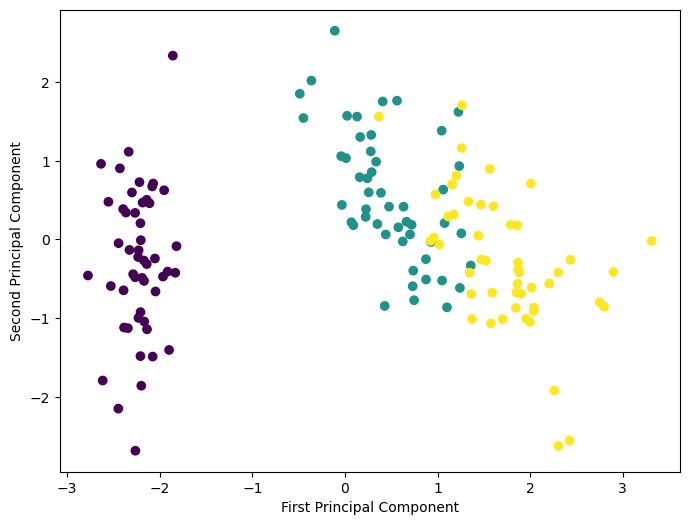

In [22]:
# Visualize the results of PCA using Matplotlib
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_scaled['target'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [25]:
# Evaluate the performance of PCA by calculating the explained variance ratio for each principal component and selecting the appropriate number of principal components for the dataset.
# Calculate the explained variance
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
explained_variance

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [26]:
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)
cumulative_explained_variance

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

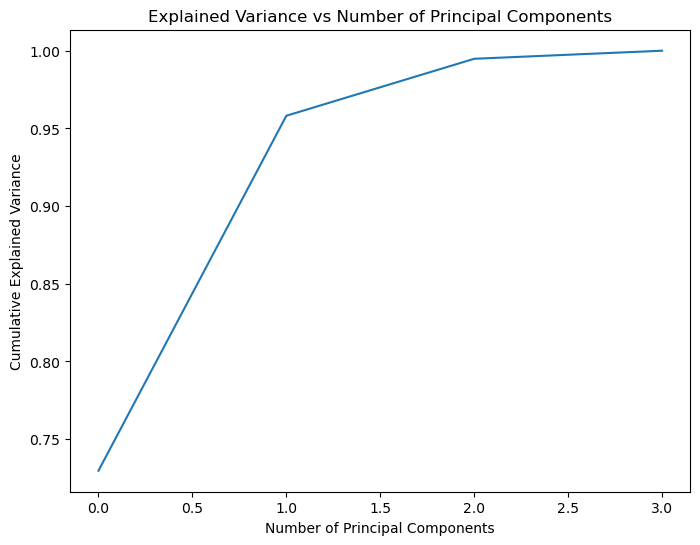

In [27]:
# Plot the cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Principal Components')
plt.show()

In [28]:
# Select the appropriate number of principal components
n_components = np.argmax(cumulative_explained_variance > 0.95) + 1
print(f"The appropriate number of principal components is {n_components}")

The appropriate number of principal components is 2
